In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #Visualizing data
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
#to avoid encoding error, use 'unicode_escape'
#Now all the data present in the csv file is stored in df as we have used equal operater(=).

In [17]:
df.shape
# This tells us about the rows and columns present in the csv file.

(11251, 15)

In [20]:
df.head()
#This outputs 5 by default rows of data. If we want to get more rows, specify the number in the brackets.
#Example:- df.head(10)  This will print 10 rows of data.

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [21]:
df.info()
#This prints the information about the csv file that is stored in df.
#It also tells us that whether the file has to be cleaned or not.
#In non-null column, if there exists 0 data, that means that particular row is not needed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [22]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
#This drops the two rows mentioned above. 
#Axis=1 means the whole vertical row. 
#inplace implements whatever is written within the cell

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
pd.isnull(df)
#This shows us whether null values are present or not.

In [26]:
pd.isnull(df).sum()
#checks for null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [27]:
df.dropna(inplace=True)
#drop null values

In [31]:
df['Amount'] = df['Amount'].astype('int')
#This changes the datatype of Amount column

GENDER

<Axes: xlabel='Gender', ylabel='count'>

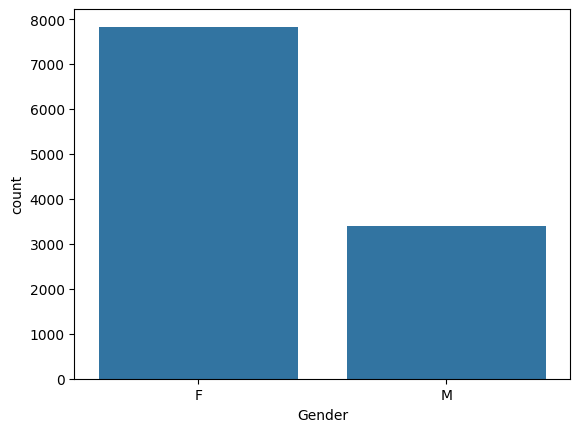

In [37]:
sns.countplot(x = 'Gender', data = df)

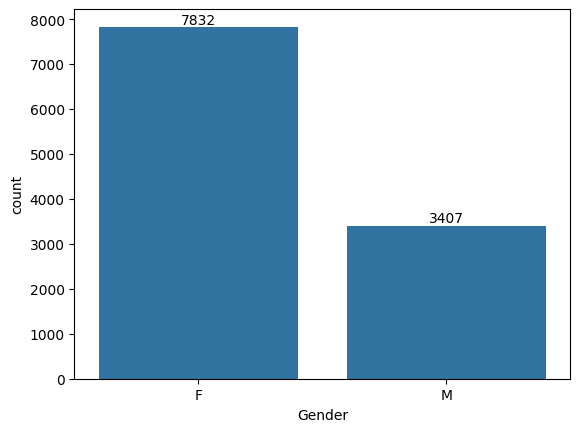

In [38]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [44]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
#Don't use descending in place of ascending as it will generate error saying that dataframe groupby has unexpected keyword.

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

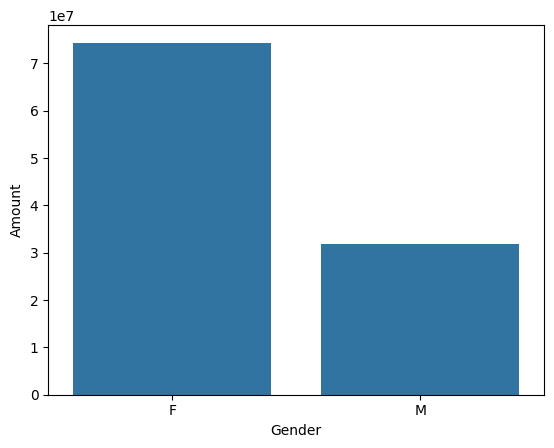

In [45]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

From above graphs we can see that most of the buyers are Females & even the purchasing power of Females is greater than Male

AGE

<Axes: xlabel='Age Group', ylabel='count'>

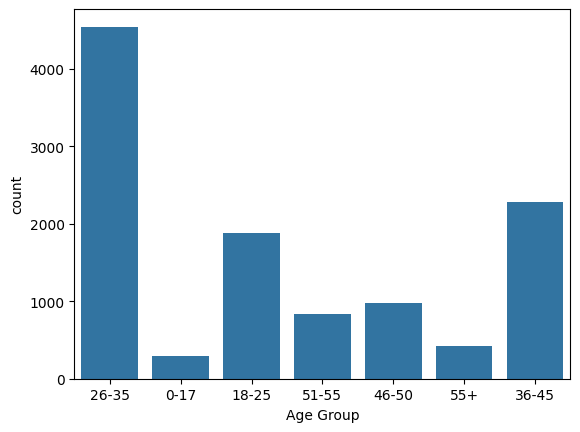

In [50]:
sns.countplot(x = 'Age Group', data = df)

<Axes: xlabel='Age Group', ylabel='count'>

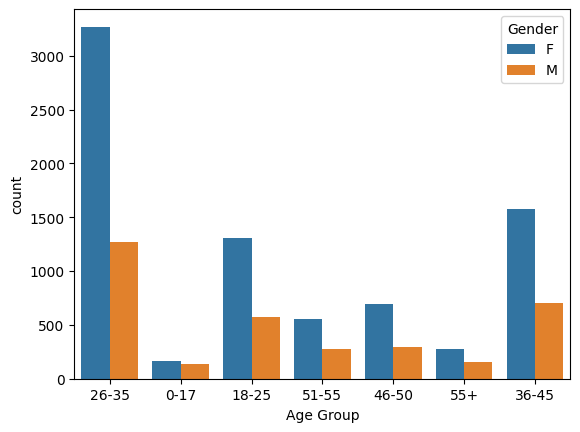

In [49]:
sns.countplot(x = 'Age Group', data = df, hue = 'Gender')
#Hue used with Gender which segregates Gender into 2 different bars that is Male & Female

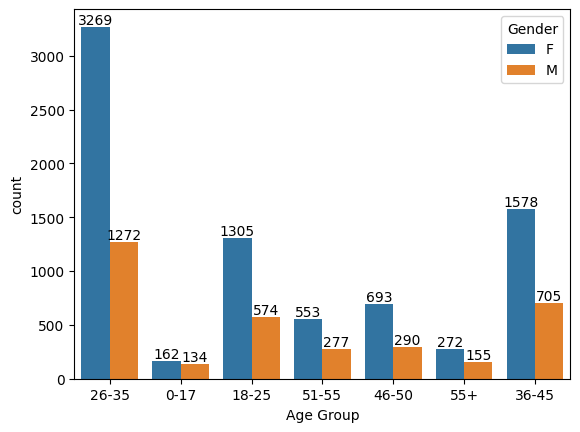

In [51]:
ay = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

for bars in ay.containers:
    ay.bar_label(bars)

In [52]:
df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

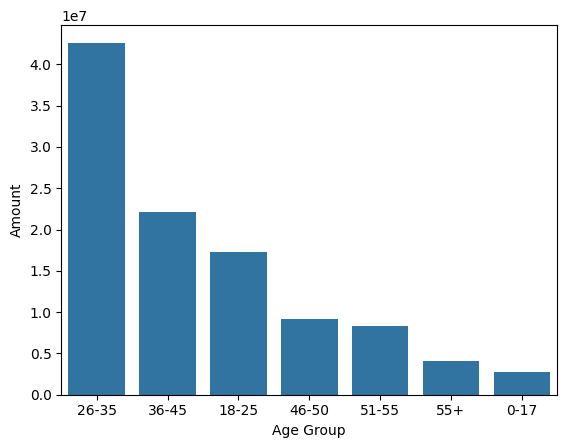

In [53]:
sales_age =  df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

From above graphs we can see that most of the buyers are Females from age group between 26-35 years.

STATE

<Axes: xlabel='State', ylabel='Orders'>

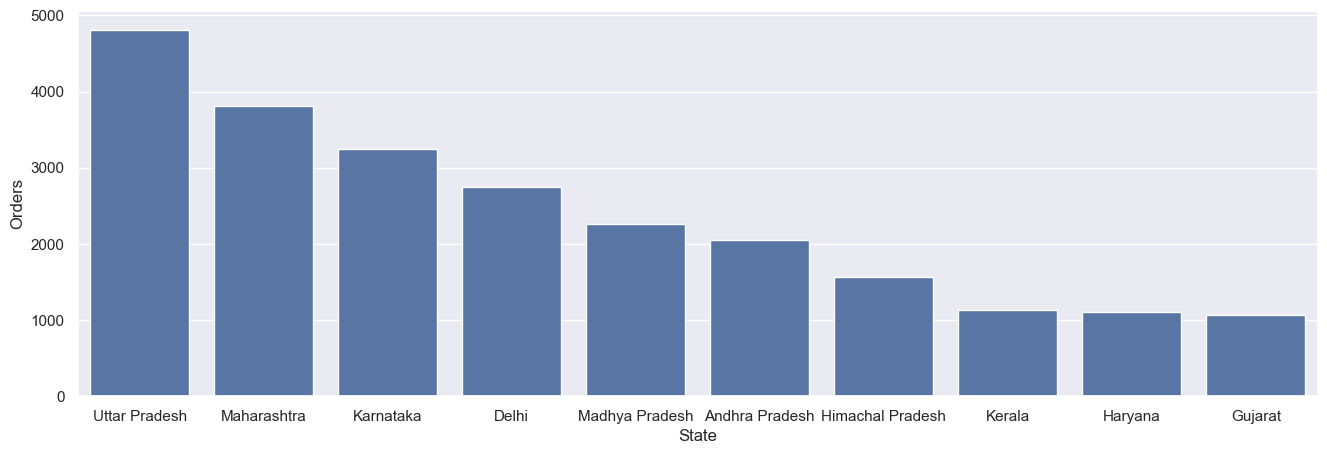

In [10]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

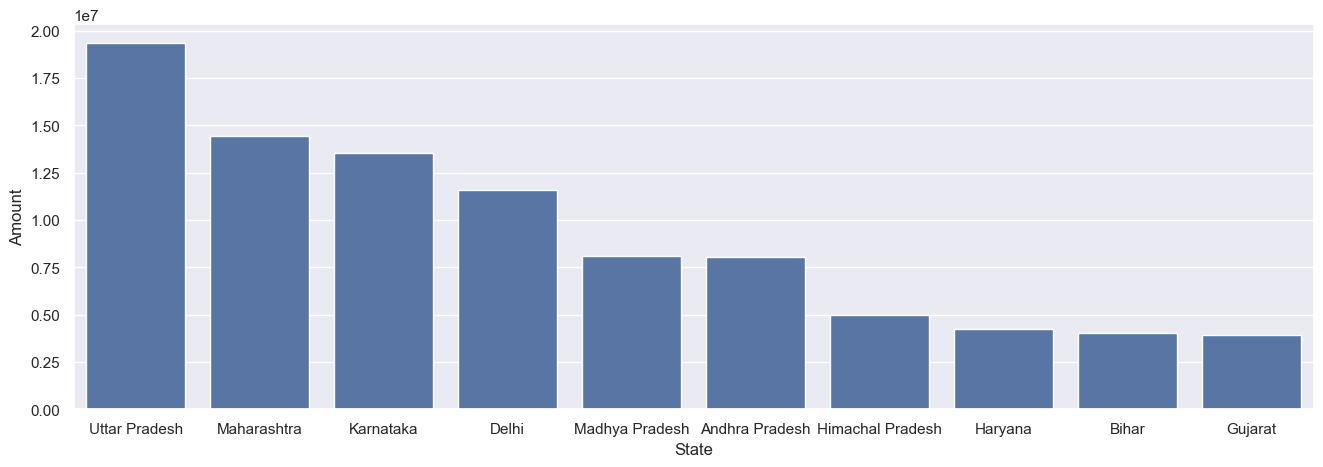

In [11]:
sales_amount = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_amount)

From above graphs,we can see that most of the orders & total sales/amount is from Uttar Pradesh, Maharashtra and Karnataka.

Marital Status

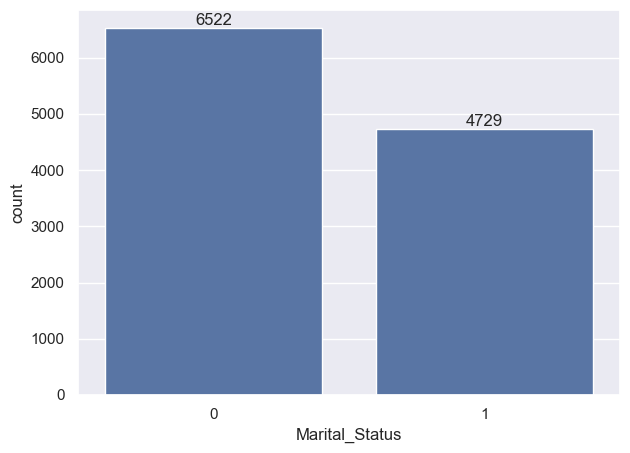

In [13]:
ms = sns.countplot(x = 'Marital_Status', data = df)

sns.set(rc={'figure.figsize':(7,3)})
for bars in ms.containers:
    ms.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

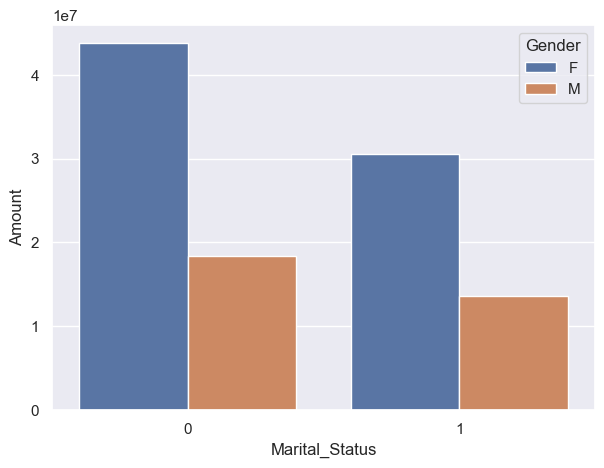

In [18]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_state, hue = 'Gender')

From above graphs, we can see that most of the buyers are married(women) and they have high purchasing power

Occupation

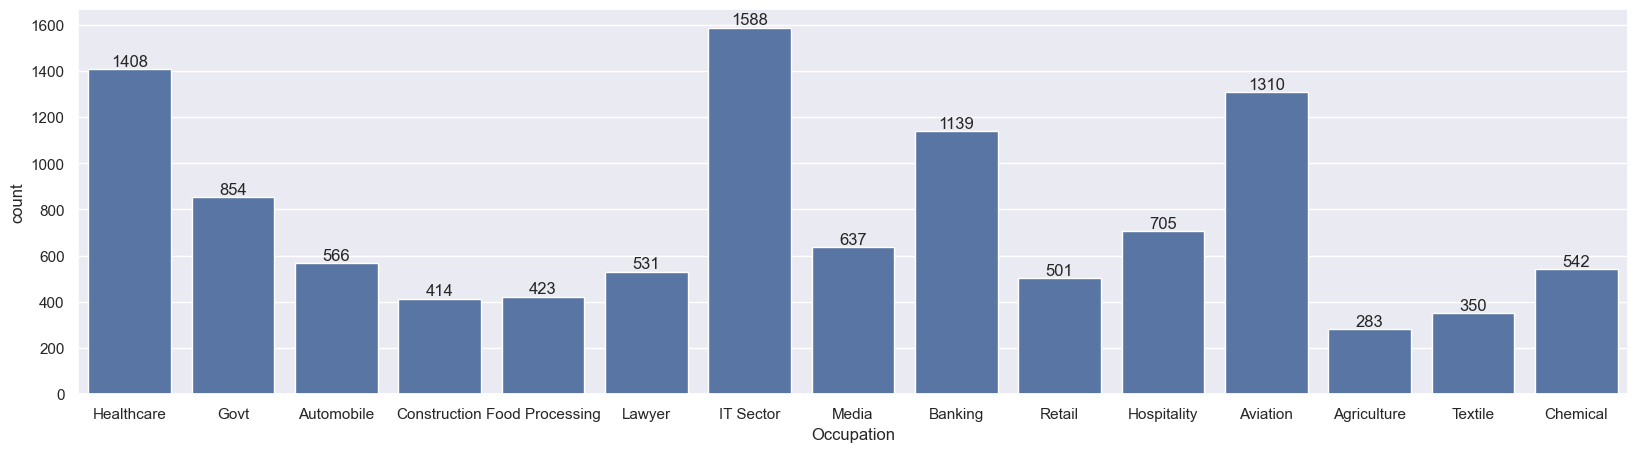

In [20]:
oc = sns.countplot(x = 'Occupation', data = df)
sns.set(rc={'figure.figsize':(20,10)})

for bars in oc.containers:
    oc.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

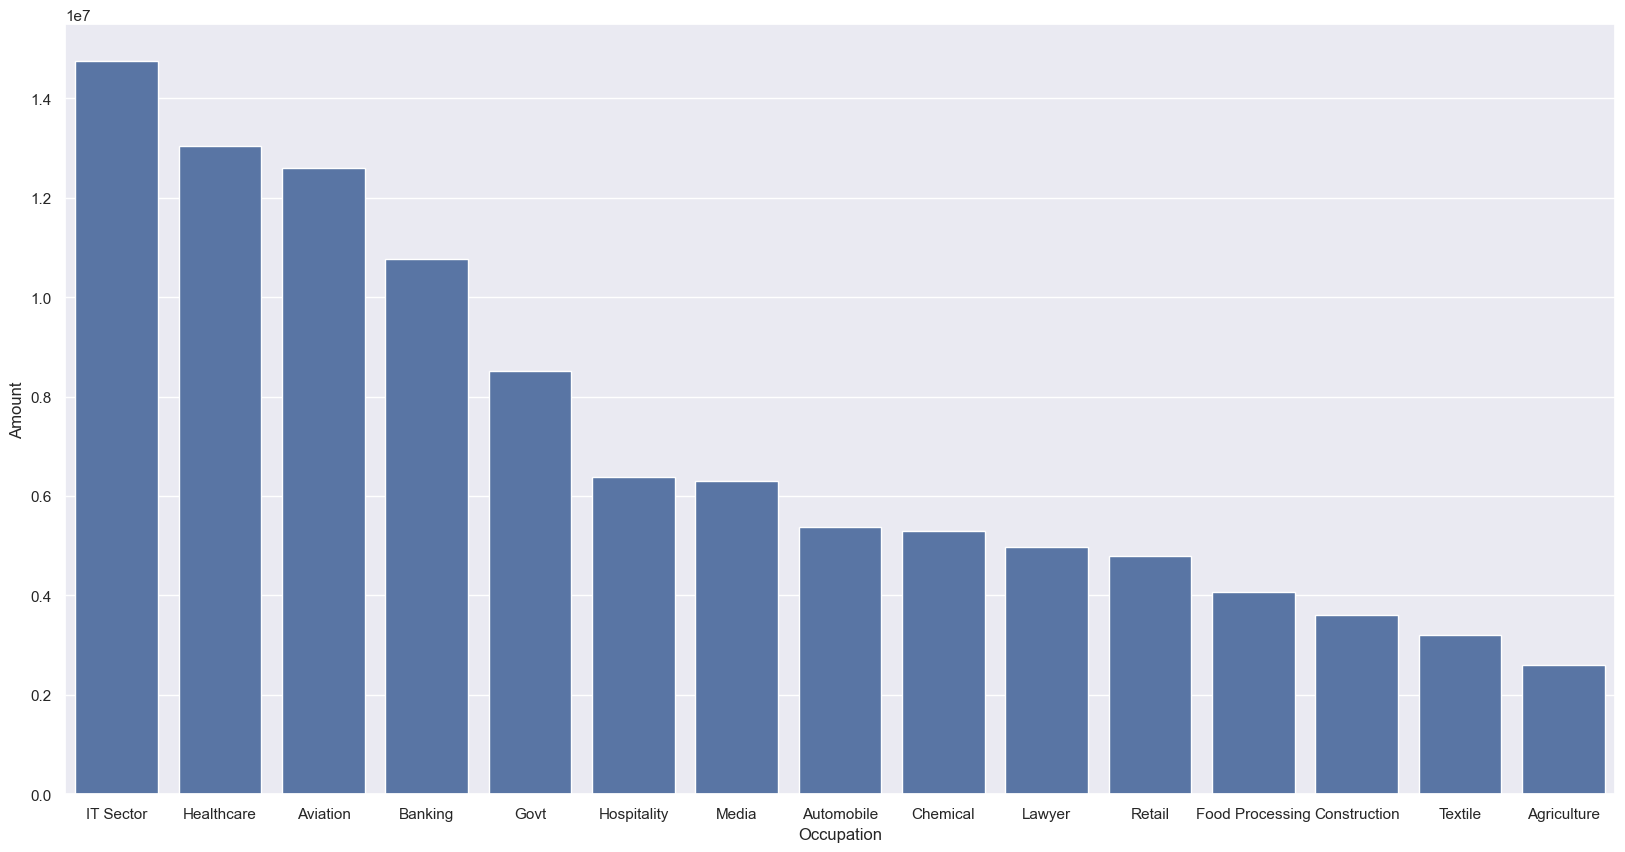

In [21]:
sales_oc = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_oc)

From above graphs, we can see that most of the buyers are working in IT sector, Healthcare & Aviation

Product Category

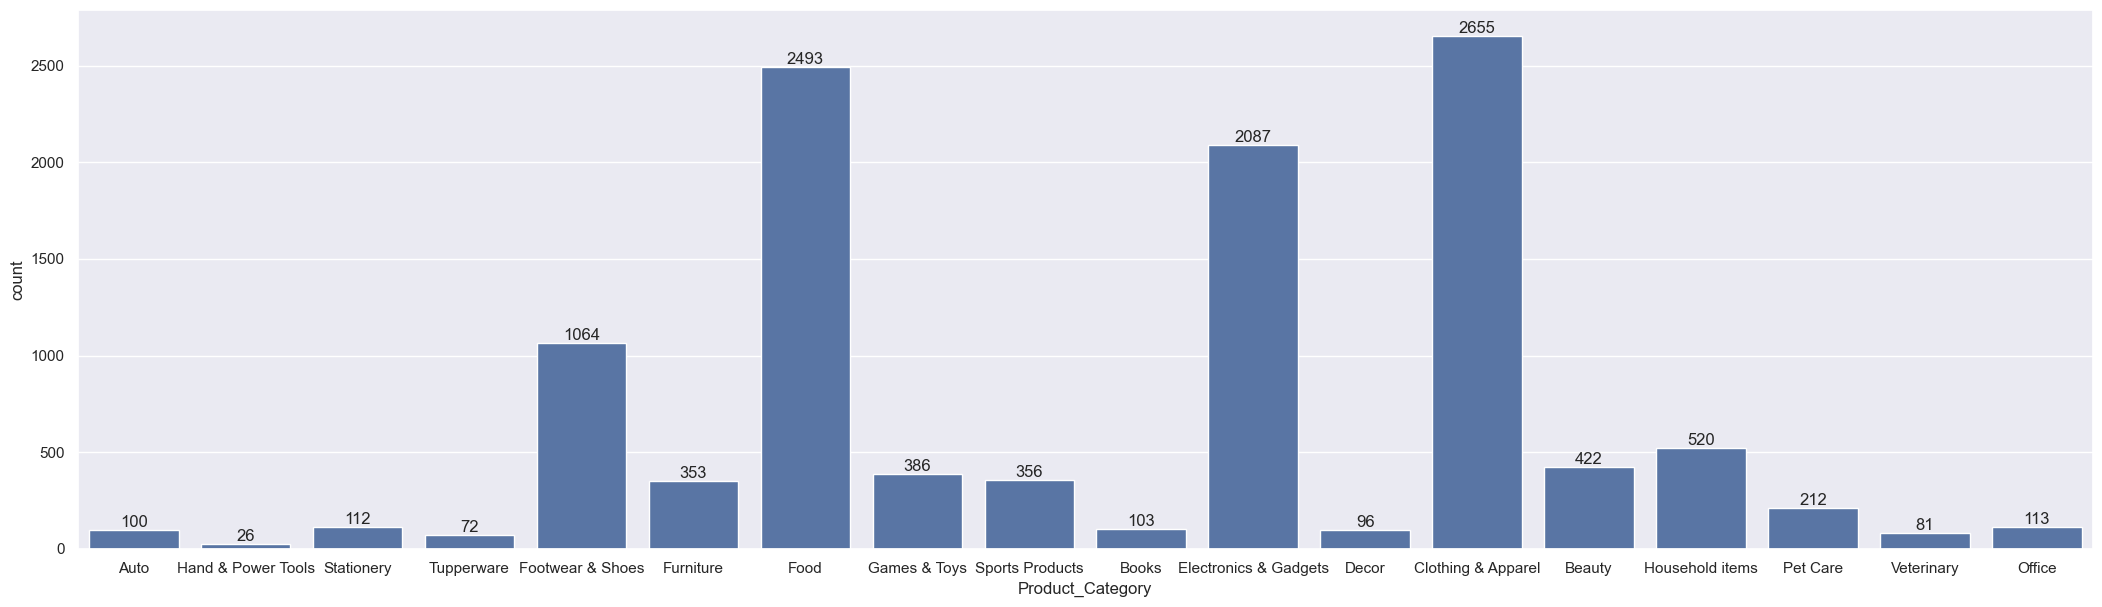

In [27]:
pc = sns.countplot(x = 'Product_Category', data = df)
sns.set(rc={'figure.figsize':(25,7)})

for bars in pc.containers:
    pc.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

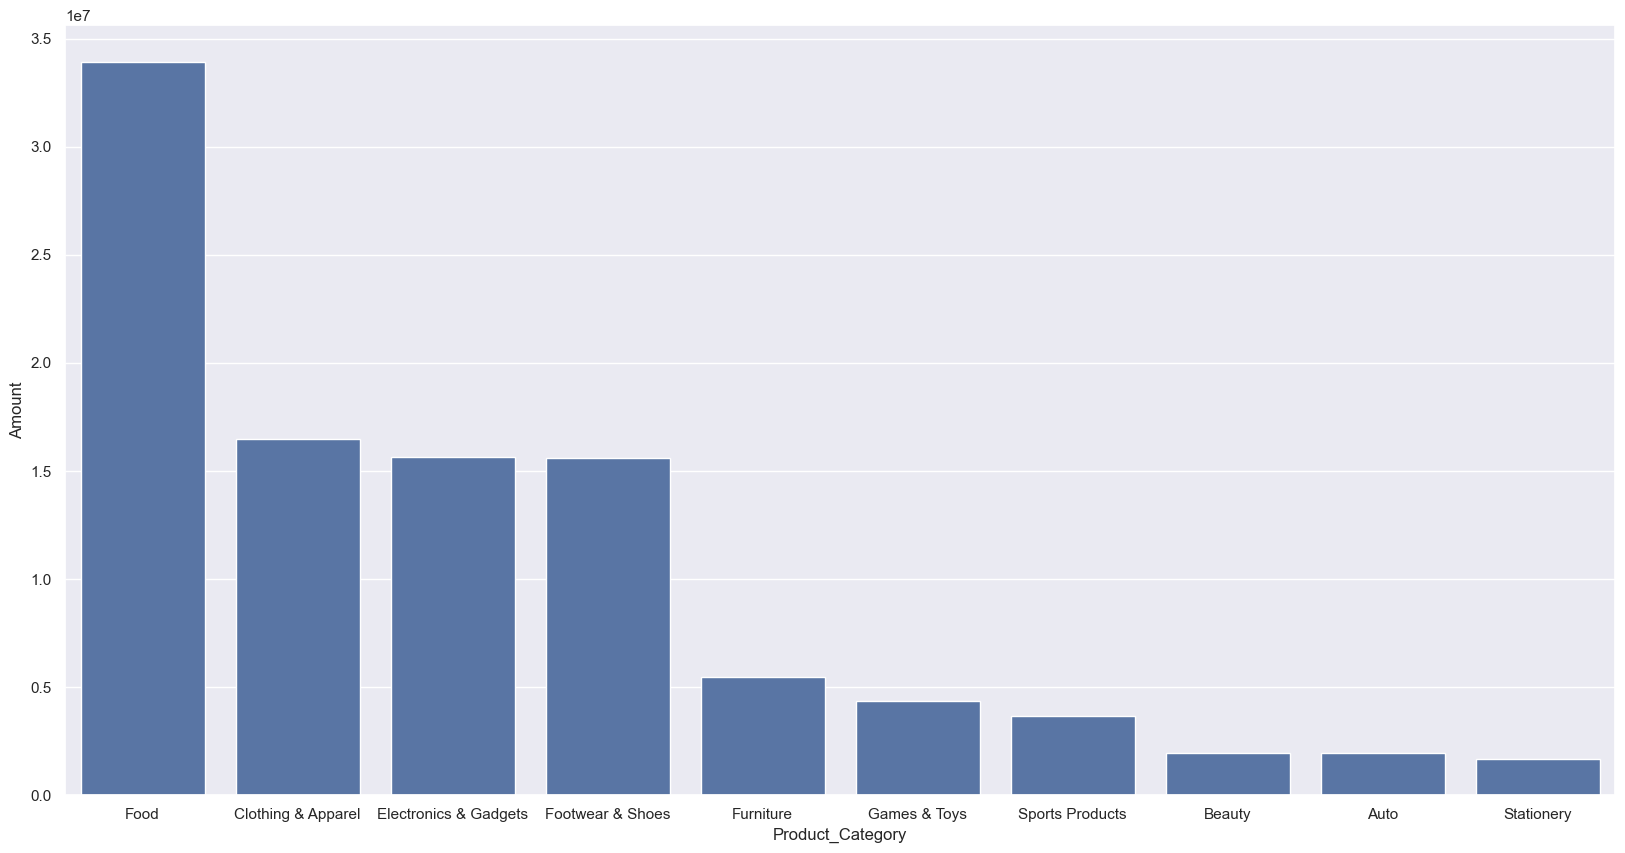

In [30]:
sales_pc = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_pc)

From above graphs, we can see that most of the sold products are from Food, Clothing & Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

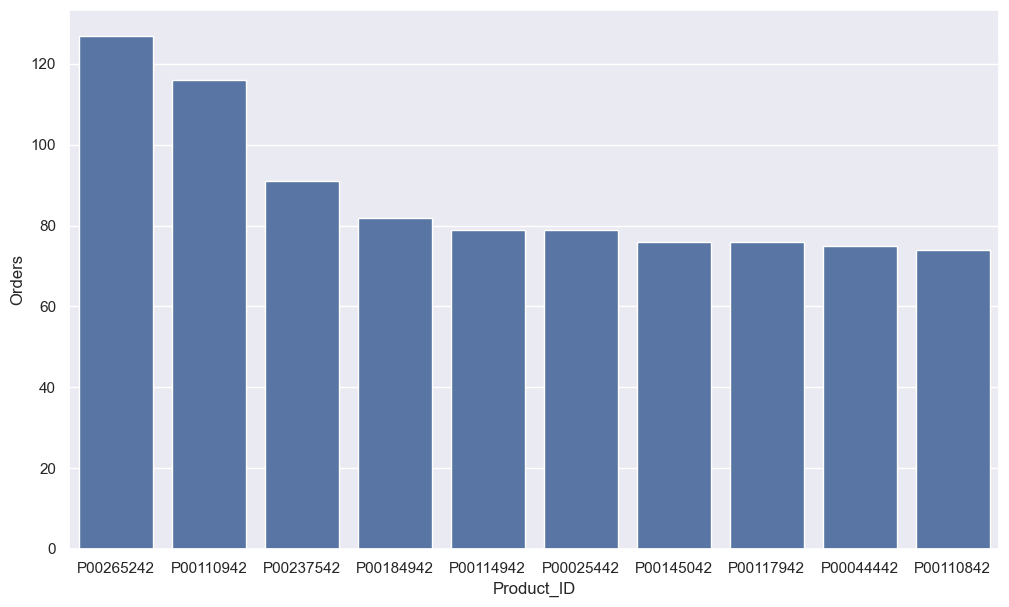

In [31]:
sales_prod = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_prod)

<Axes: xlabel='Product_ID'>

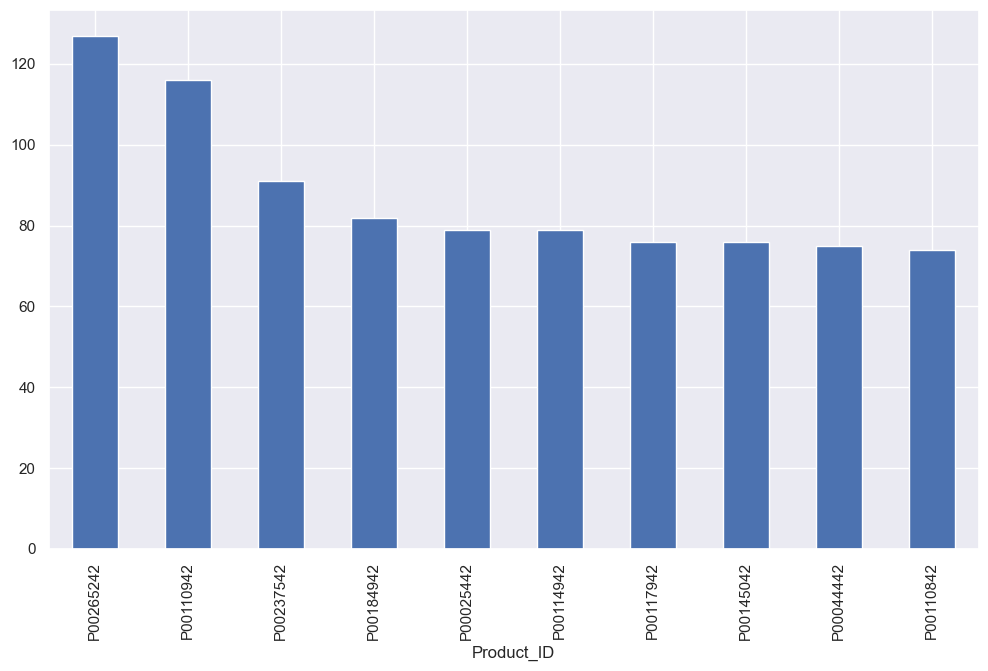

In [32]:
#Top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

Conclusion

Married women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.

Thank You!
